<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NumPy-Tricks" data-toc-modified-id="NumPy-Tricks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NumPy Tricks</a></span><ul class="toc-item"><li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Broadcasting</a></span></li><li><span><a href="#Meshgrid" data-toc-modified-id="Meshgrid-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Meshgrid</a></span></li><li><span><a href="#mgrid" data-toc-modified-id="mgrid-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>mgrid</a></span></li></ul></li><li><span><a href="#Image-Display" data-toc-modified-id="Image-Display-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Display</a></span><ul class="toc-item"><li><span><a href="#Using-imshow" data-toc-modified-id="Using-imshow-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using <code>imshow</code></a></span></li><li><span><a href="#Origin" data-toc-modified-id="Origin-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Origin</a></span></li><li><span><a href="#Colormaps" data-toc-modified-id="Colormaps-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Colormaps</a></span></li><li><span><a href="#Colorbar" data-toc-modified-id="Colorbar-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Colorbar</a></span></li></ul></li><li><span><a href="#Image-Manipulation" data-toc-modified-id="Image-Manipulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Manipulation</a></span><ul class="toc-item"><li><span><a href="#Reading-PNG-files" data-toc-modified-id="Reading-PNG-files-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reading PNG files</a></span></li><li><span><a href="#Slice-and-merging" data-toc-modified-id="Slice-and-merging-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Slice and merging</a></span></li><li><span><a href="#Adding-some-noise" data-toc-modified-id="Adding-some-noise-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adding some noise</a></span></li><li><span><a href="#Some-stats-with-NumPy" data-toc-modified-id="Some-stats-with-NumPy-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Some stats with NumPy</a></span></li></ul></li><li><span><a href="#Using-SciPy" data-toc-modified-id="Using-SciPy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using SciPy</a></span><ul class="toc-item"><li><span><a href="#Reference-Material" data-toc-modified-id="Reference-Material-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Reference Material</a></span></li><li><span><a href="#Statistical-Mode" data-toc-modified-id="Statistical-Mode-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Statistical Mode</a></span></li><li><span><a href="#ndimage" data-toc-modified-id="ndimage-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ndimage</a></span></li></ul></li><li><span><a href="#Masked-Arrays" data-toc-modified-id="Masked-Arrays-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Masked Arrays</a></span></li></ul></div>

# PTS2019 - Data Analysis and Visualization 2

This notebook is part of the Python Tutorial Series presented in the Gemini Observatory. In this edition, I will show you some tricks using NumPy that are very useful when working with image. I will show also how to display images and some of the options available. Finally, I will show you how to manipulate images using NumPy, MatPlotLib and SciPy. It is a very dense edition so I will try to keep all the material available here for reference.

Before we start, let us perform some imports and change some plot styles:

In [117]:
%matplotlib notebook
import matplotlib as mpl
import numpy as np

my_presentation_style = {
    'axes.titlesize' : 24,
    'axes.labelsize' : 20,
    'figure.dpi' : 100,
    'lines.linewidth' : 2,
    'lines.markersize' : 10,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,   
}

for key in my_presentation_style:
    mpl.rcParams[key] = my_presentation_style[key]
    
from matplotlib import pyplot as plt

## NumPy Tricks

Before we start to manipulate our images, we might want to learn some array manipulation tricks like matrix generation and broadcasting.

### Broadcasting

The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations if they satisfy some constrains. Here is an example:

In [118]:
x = [[1, 1, 1],
     [2, 2, 2]]

x = np.array(x)
print(x.shape)

(2, 3)


In [119]:
y1 = 3

z1 = x * y1
print(z1)

[[3 3 3]
 [6 6 6]]


In [120]:
y2 = [3, 4, 5]
y2 = np.array(y2)
print(y2.shape)

(3,)


In [121]:
z2 = x * y2
print(z2)

[[ 3  4  5]
 [ 6  8 10]]


In [122]:
y3 = [6, 7]
y3 = np.array(y3)
print(y3.shape)

(2,)


In [123]:
z3 = x * y3
print(z3)

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [124]:
y3 = [6, 7]
y3 = np.array(y3)
y3 = y3[:, np.newaxis]
print(y3.shape)

(2, 1)


In [125]:
z3 = x * y3
print(z3)

[[ 6  6  6]
 [14 14 14]]


When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when

- they are equal, or
- one of them is 1

### Meshgrid

Numpy also has some tools that can be to create index matrices to be used later on image manipulation. You can do that using the `numpy.meshgrid` or the `numpy.mgrid` function. Let us start with `meshgrid()`.

First we create a 1D array with columns indexes and another with row indexes:

In [126]:
n = 5
col_indexes = np.arange(n)
print(col_indexes)

[0 1 2 3 4]


In [127]:
m = 10
row_indexes = np.arange(m)
print(row_indexes)

[0 1 2 3 4 5 6 7 8 9]


We can now use `meshgrid` and check the output:

In [128]:
cols, rows = np.meshgrid(col_indexes, row_indexes)

`meshgrid` will return two arrays. The first one (`cols`) contains a `n x m` array with the first input array repeated on `m` rows:

In [129]:
print(cols)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


The seconde one (`rows`) contains also a `n x m` array but, this time, it contains the seconds input array repeated on `n` columns:

In [130]:
print(rows)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


Here is the compact version used in the PowerPoint presentation:

In [131]:
X = cols
Y = rows

In [132]:
print(X)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [133]:
print(Y)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


### mgrid

We can have the same result using `numpy.mgrid`:

In [134]:
rows2, cols2 = np.mgrid[0:m, 0:n]
print(rows2)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


Please, note that the order of the rows and columns are not the same when using `meshgrid` and `mgrid` though:

In [135]:
cols, rows = np.meshgrid(col_indexes, row_indexes)

rows2, cols2 = np.mgrid[0:m, 0:n]

## Image Display

MatPlotLib is the main Python library for plotting and displaying images. Most other existing packages have it as dependency and, because of that, it is very useful to understand some details. Since this is the second time we are using MatPlotLib, I will jump ahead and show you how to display images, 2D arrays or similar data.

### Using `imshow`

Let's start with a very simple example. We will create a 5 x 5 array with random number between 0 and 1, and display it.

<IPython.core.display.Javascript object>


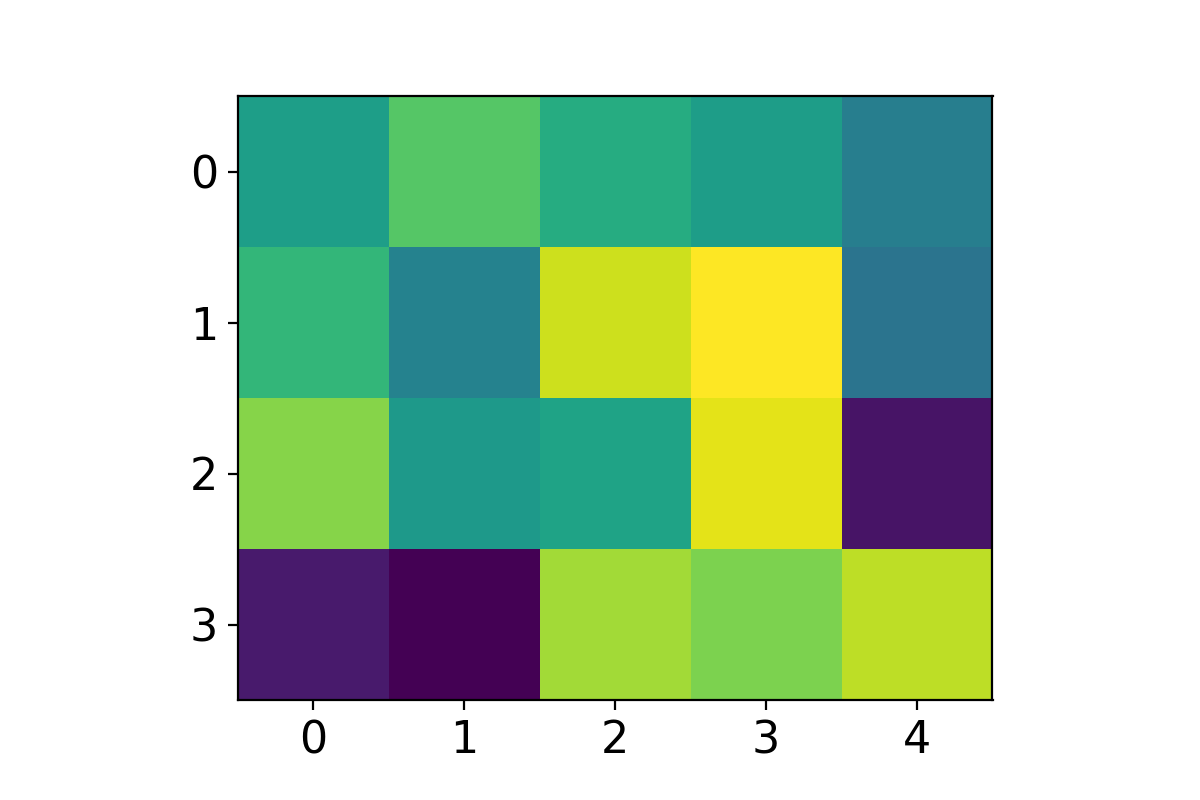

In [136]:
np.random.seed(0)  # Make sure I get the same results every time
data = np.random.uniform(size=(4, 5))  # 4 x 5 matrix with random values in between 0 and 1

fig, ax = plt.subplots(num='A simple array with random values')
ax.imshow(data)
plt.show()

### Origin

Most of us (astronomers) are used to see the origin of a plot in the bottom-left edge of the image while MatPlotLib's default is on the top-left of the image. This can be changed by passing the parameter `origin="lower"` to `ax.imshow(...)`:

<IPython.core.display.Javascript object>


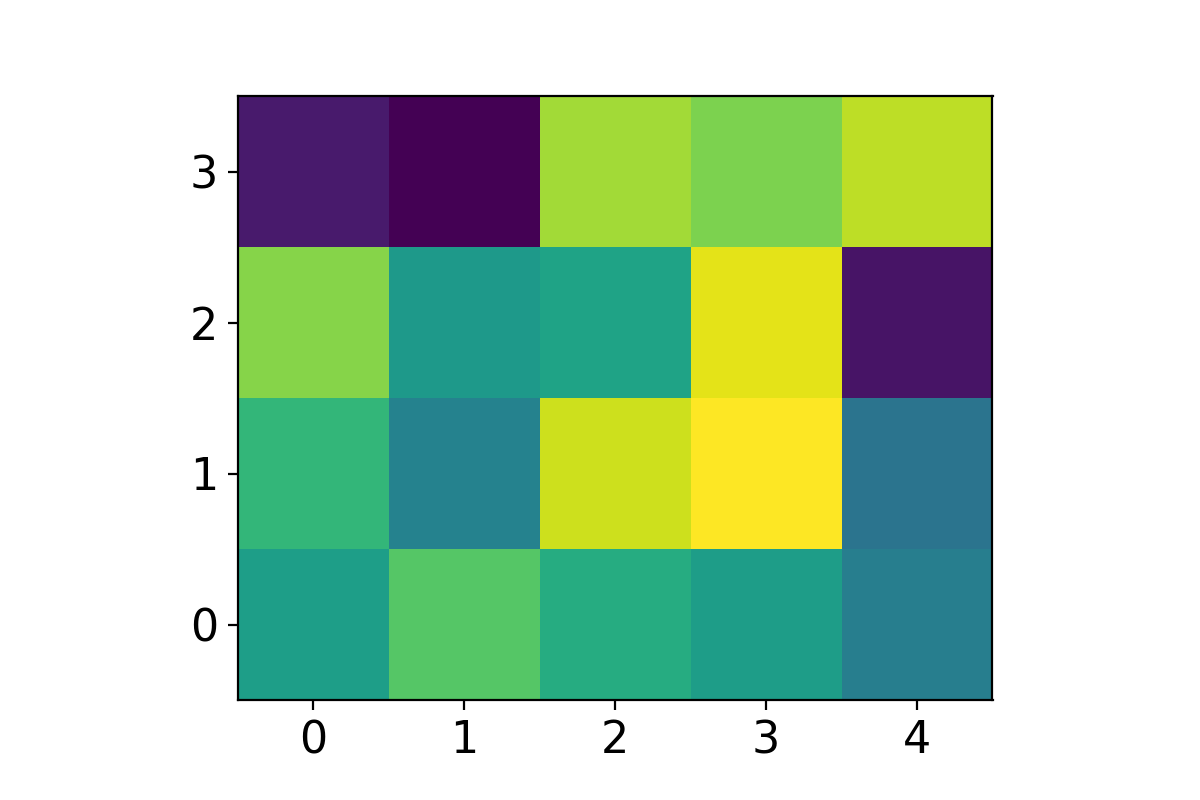

In [137]:
fig, ax = plt.subplots(num='lower origin')
ax.imshow(data, origin="lower")
plt.show()

### Colormaps

MatPlotLib also comes with an imense list of color maps to be used in different cases. You can check all the colormaps available quickly with the following command:

In [138]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

The `_r` colormaps are inverted/reversed colormaps. Let's use `mgrid` and broadcasting to bring up an interesting discussion on colormaps:

In [139]:
n, m = 300, 1000
y, x = np.mgrid[0:n, 0:m]

x = x / x.max()
y = y / y.max()

z = x + y ** 3 * 0.5 * np.cos(2 * np.pi * 2 ** 5 * x) 

And now we display `z` using the default colormap:

<IPython.core.display.Javascript object>


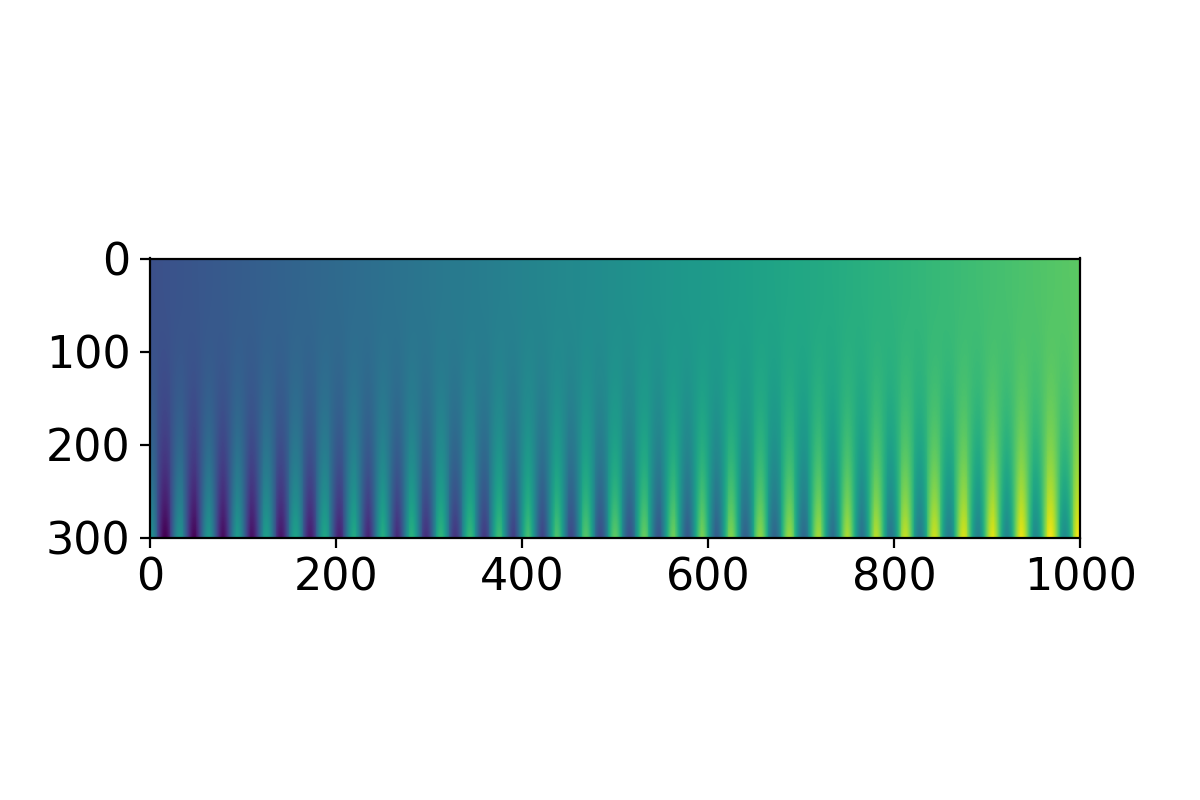

In [140]:
fig, ax = plt.subplots(num='default_colormap')
ax.imshow(z)
plt.show()

If we want to use grayscale, we need to pass the `cmap="gray"` argument to `ax.imshow(...)`:

<IPython.core.display.Javascript object>


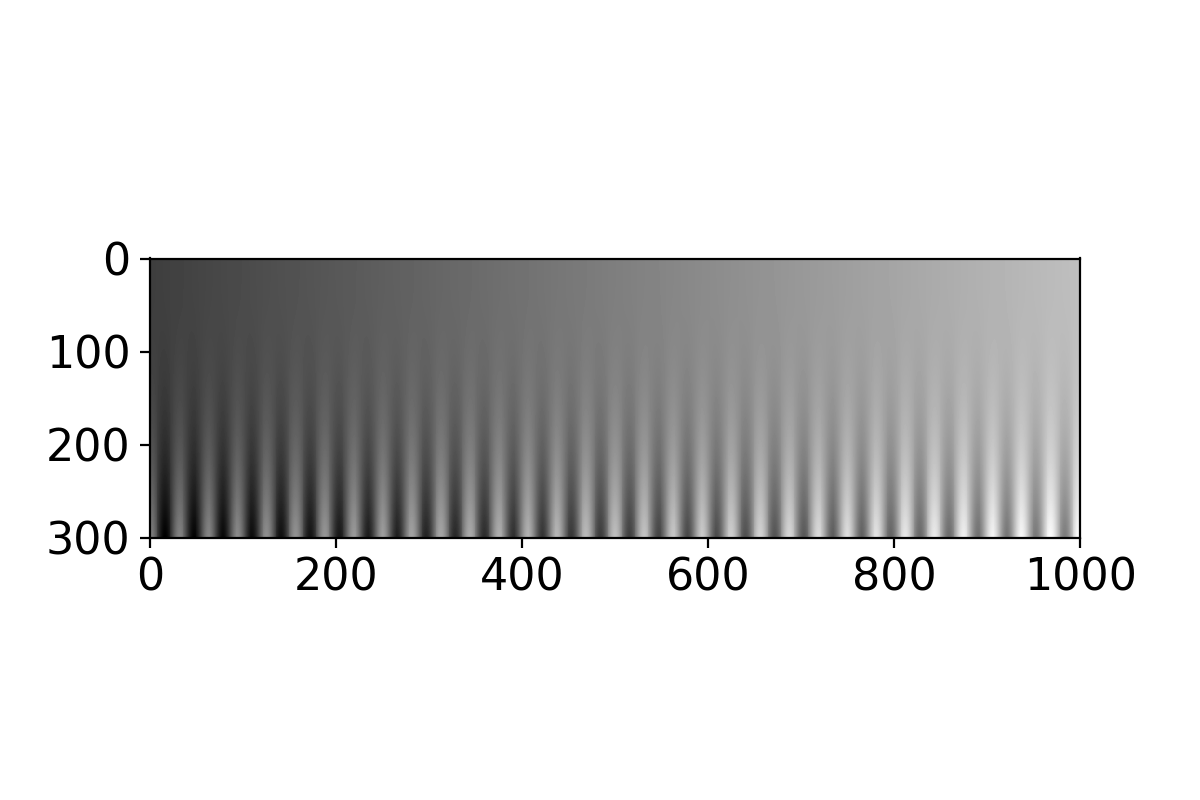

In [141]:
fig, ax = plt.subplots(num='gray_colormap')
ax.imshow(z, cmap="gray")
plt.show()

Astronomers, for some historical reason, like a lot to use the "rainbow" colormap, called `jet` in MatPlotLib. Here it is what it looks like:

<IPython.core.display.Javascript object>


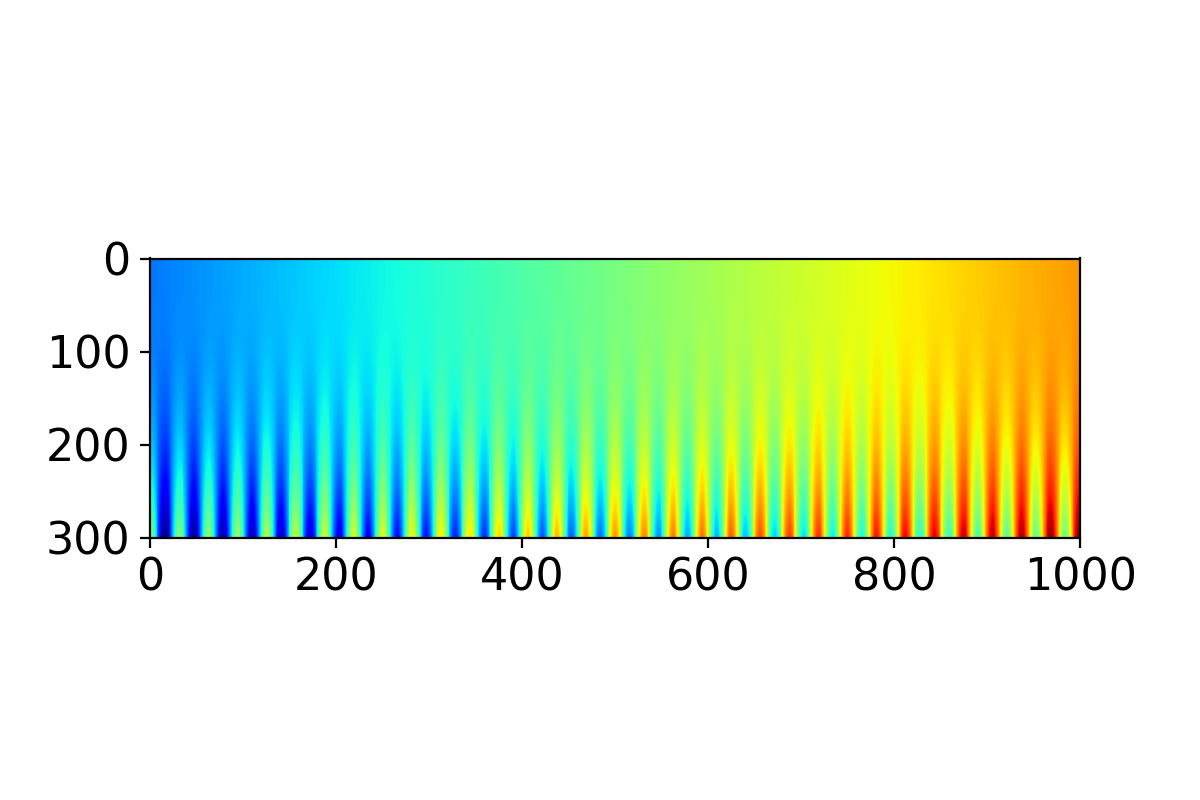

In [142]:
fig, ax = plt.subplots(num='jet_colormap')
ax.imshow(z, cmap="jet")
plt.show()

Note how this colormap hides the features in the middle of the image above. If you are displaying data, you should avoid it at any cost. Try the new `rainbow` colormap instead:

<IPython.core.display.Javascript object>


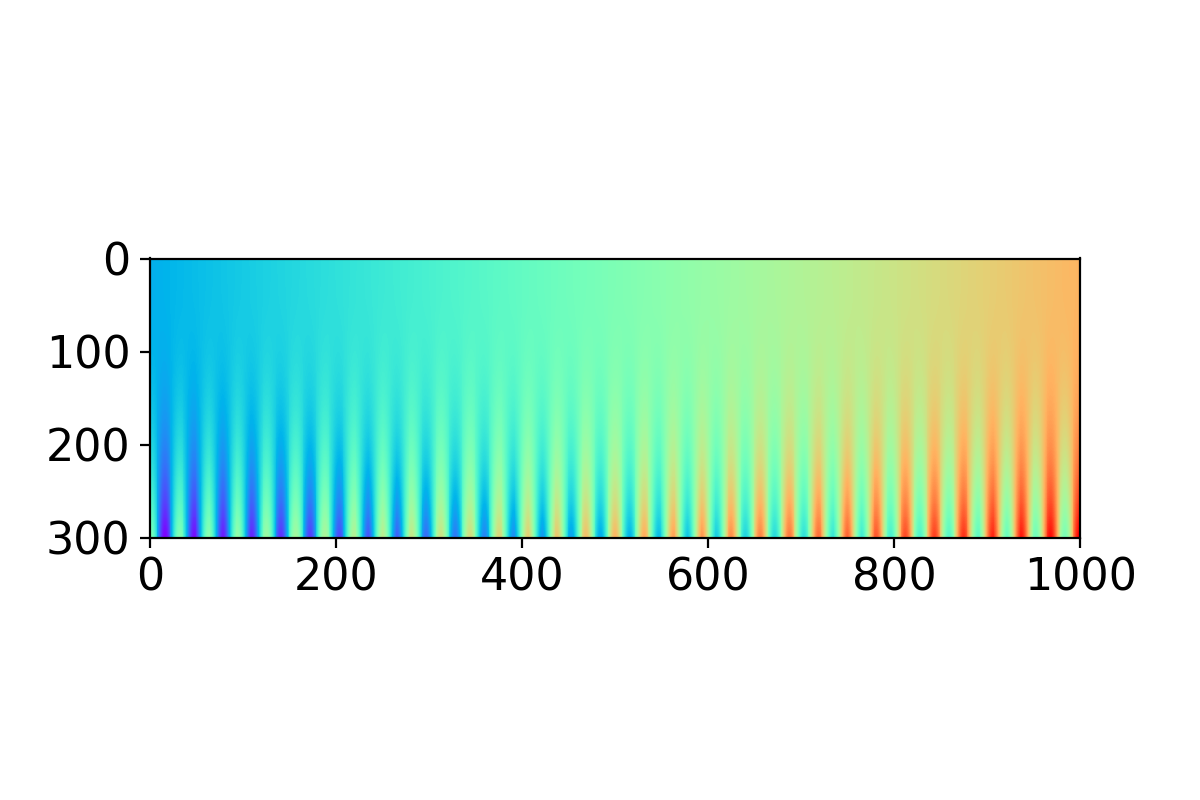

In [143]:
fig, ax = plt.subplots(num='rainbow_colormap')
ax.imshow(z, cmap="rainbow")
plt.show()

If you are displaying some diverging data, you might try one of the [Diverging Colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#diverging). In cases of Blueshift/Redshift, here is one you can try:

<IPython.core.display.Javascript object>


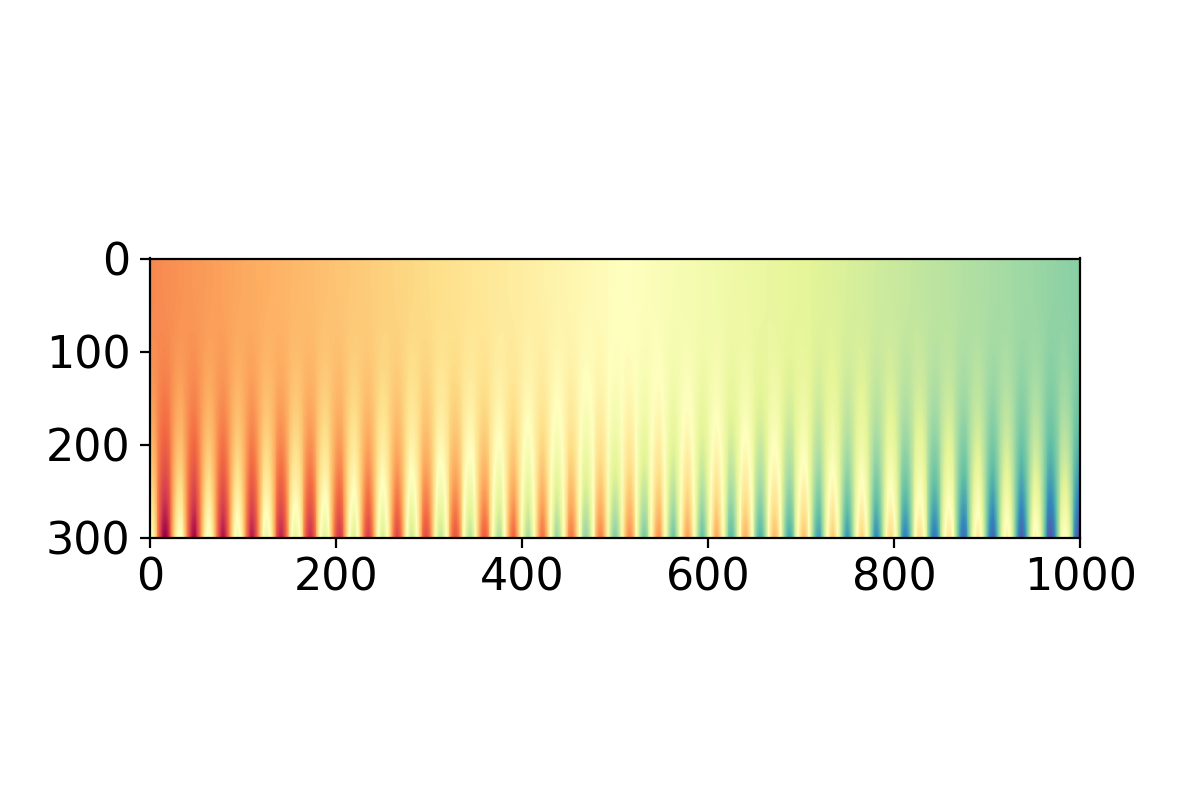

In [144]:
fig, ax = plt.subplots(num='Spectral_colormap')
ax.imshow(z, cmap="Spectral")
plt.show()

Matplotlib has also some [Qualitatives Colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#qualitative) that can be useful:

<IPython.core.display.Javascript object>


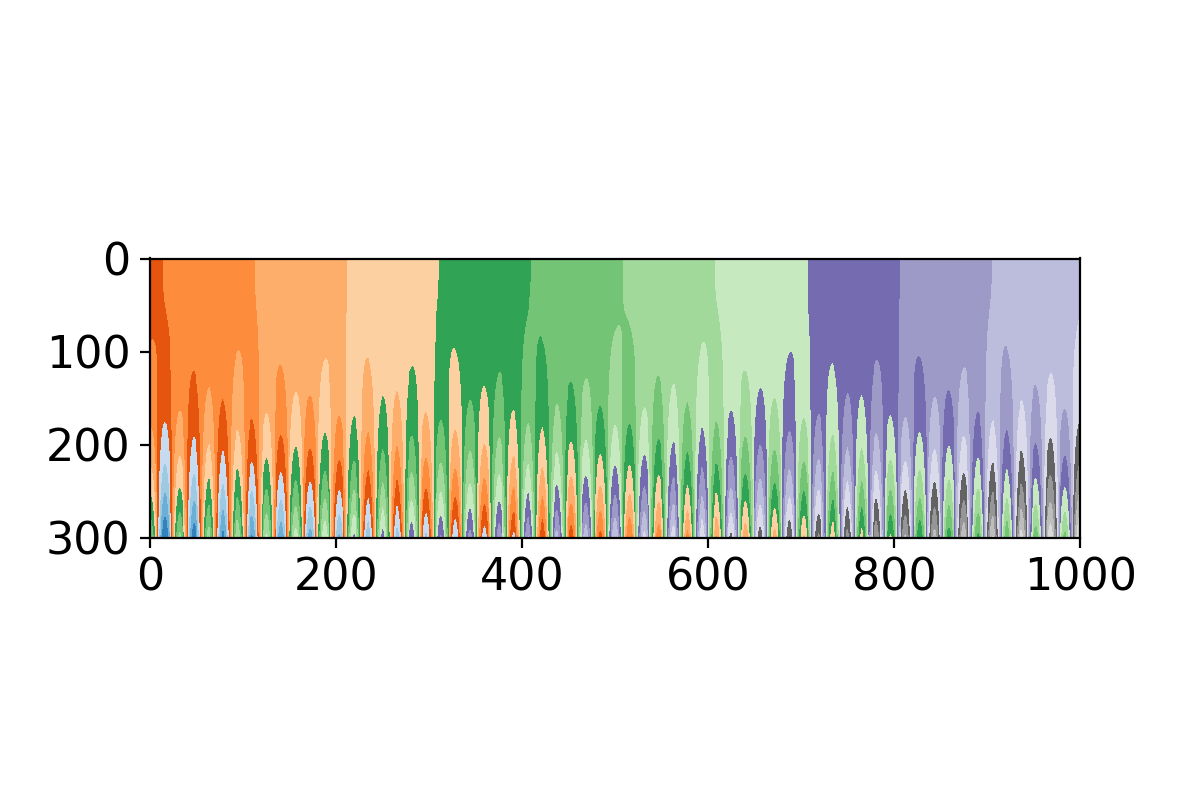

In [145]:
fig, ax = plt.subplots(num='qualitative_colormap')
ax.imshow(z, cmap="tab20c")
plt.show()

Matplolib have a set of perceptually uniform colormaps and their use are encouraged:

<IPython.core.display.Javascript object>


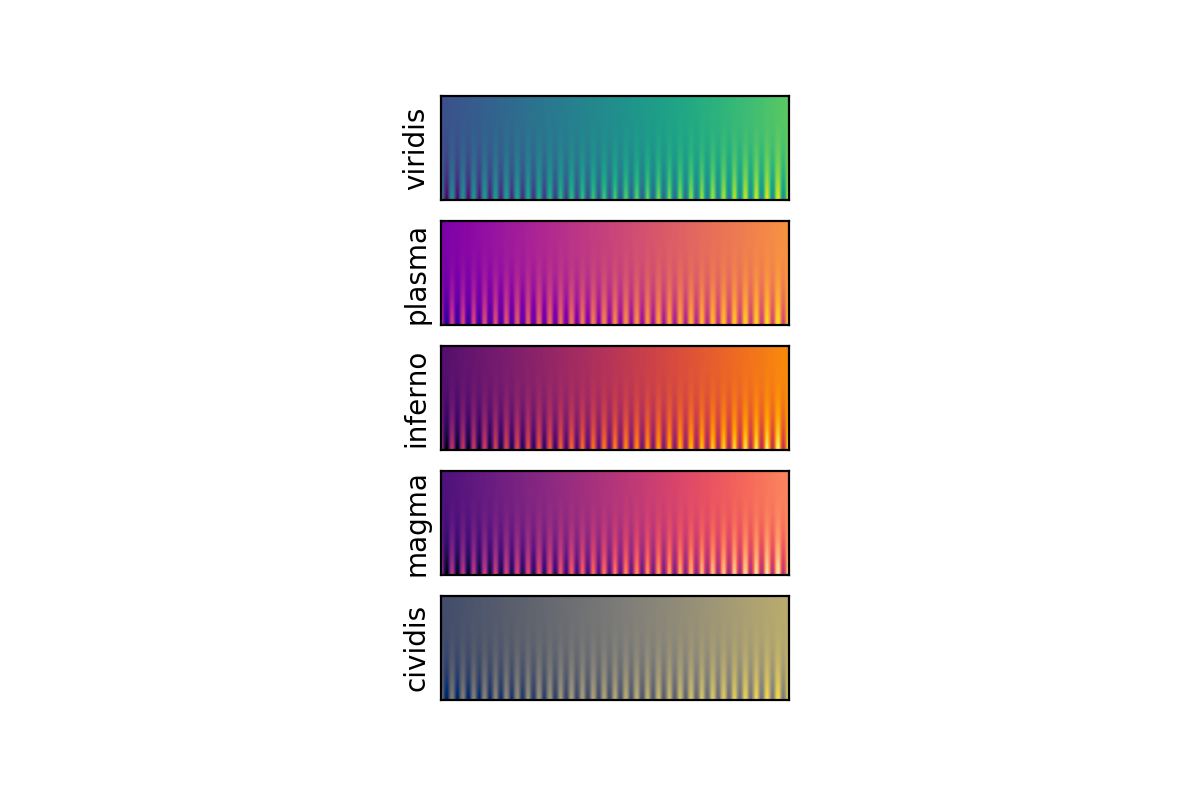

In [146]:
perceptually_uniform_colormaps = \
    ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

fig, axes = plt.subplots(
    num='several_cmaps', nrows=5, sharex=True)

for i, colormap in enumerate(perceptually_uniform_colormaps):
    axes[i].imshow(z, cmap=colormap)
    axes[i].set_yticks([])
    axes[i].set_xticks([])
    axes[i].set_ylabel(colormap, fontsize="10")
    
plt.show()

### Colorbar 

Colorbars are critical elements when displaying data. MatPlotLib allows us to add a colorbar to our figure using several methods. Let me show you two examples. 

Here is the simplest way to do it:

<IPython.core.display.Javascript object>


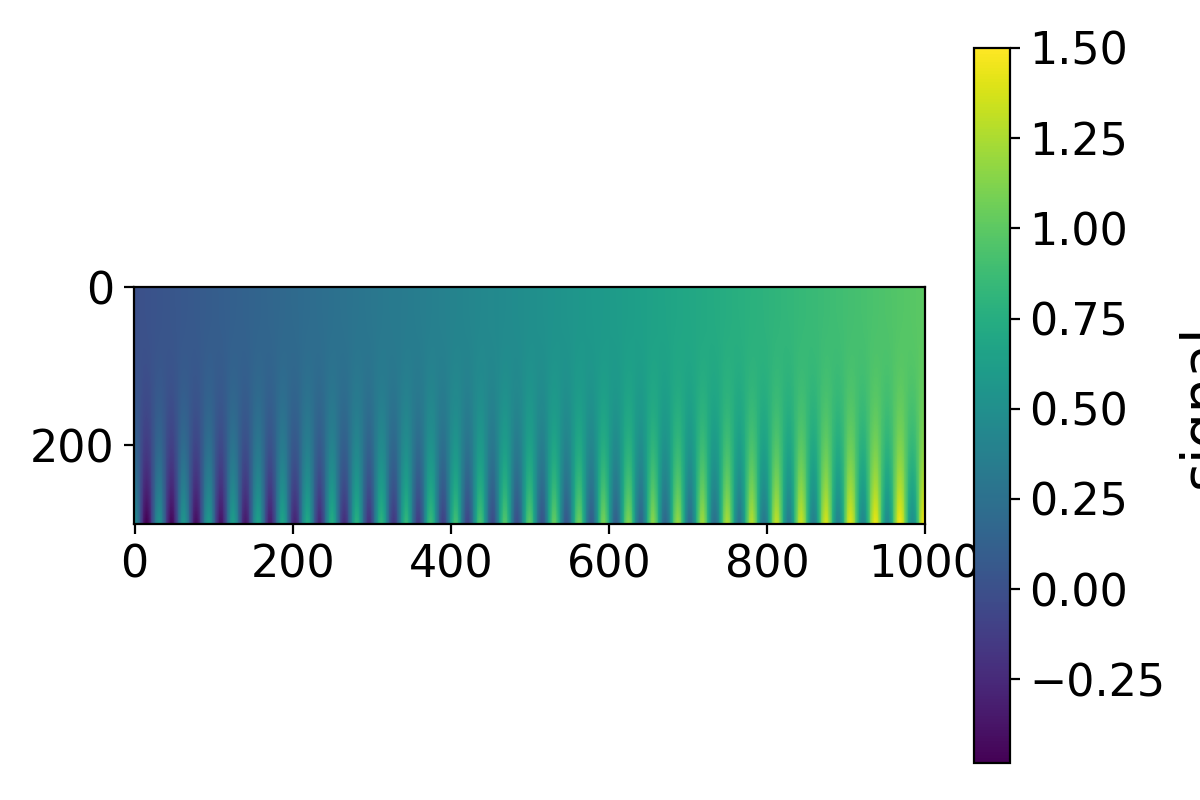

In [147]:
fig, ax = plt.subplots(num='ex:colorbar_1')

im = ax.imshow(z)

colorbar = fig.colorbar(im)
colorbar.set_label('signal')

fig.tight_layout()
plt.show()

Note that we are storing the display properties inside the `im` variable (`im = ax.imshow(z)`). This is then passed to the colorbar creation later (`colorbar = fig.colorbar(im)`). Then, we add a label to the colorbar with
`colorbar.set_label('signal')`. Finally, we tell the figure to try to accomodate the plot elements inside using `fig.tight_layout()`. 

Note also that the size of the colorbar does not match the size of the image. This can be fixed but it requires more manipulation. Here is the full example:

<IPython.core.display.Javascript object>


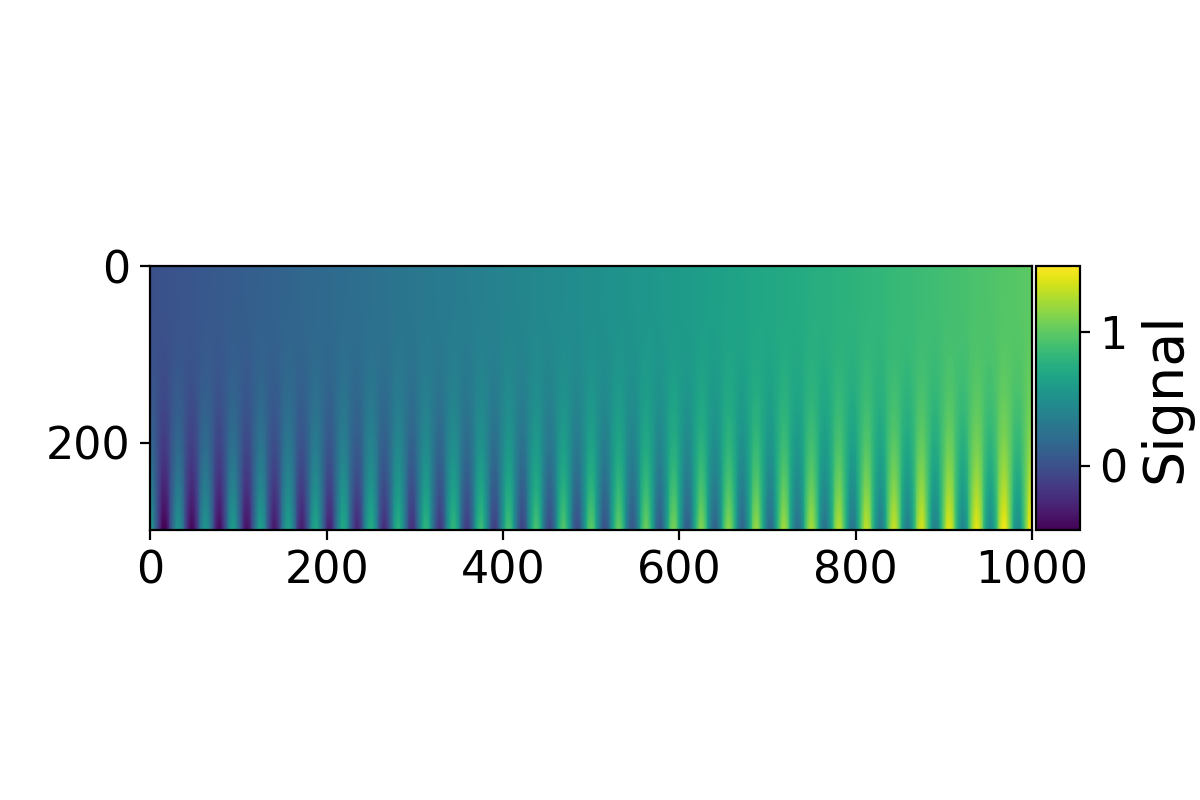

In [319]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import make_axes_locatable

my_fig, ax = plt.subplots(num='ex:colorbar_2')

im = ax.imshow(z)
divider = make_axes_locatable(ax)
colorbar_ax = divider.append_axes("right", "5%", pad='0.5%')

colorbar = my_fig.colorbar(im, cax=colorbar_ax)
colorbar.set_label('Signal')

plt.show()

<span style="color: red">Warning:</span> this method may not work depending on the MatPlotLib backend used. For example, unexpected behaviour was found when using it with `%matplotlib inline`.

## Image Manipulation

Most of operations on images are simply operations on `numpy.ndarrays`. That means that before you start doing anything, check your data and get to know it.

### Reading PNG files

You can read PNG files using `matplotlib`: 

<IPython.core.display.Javascript object>


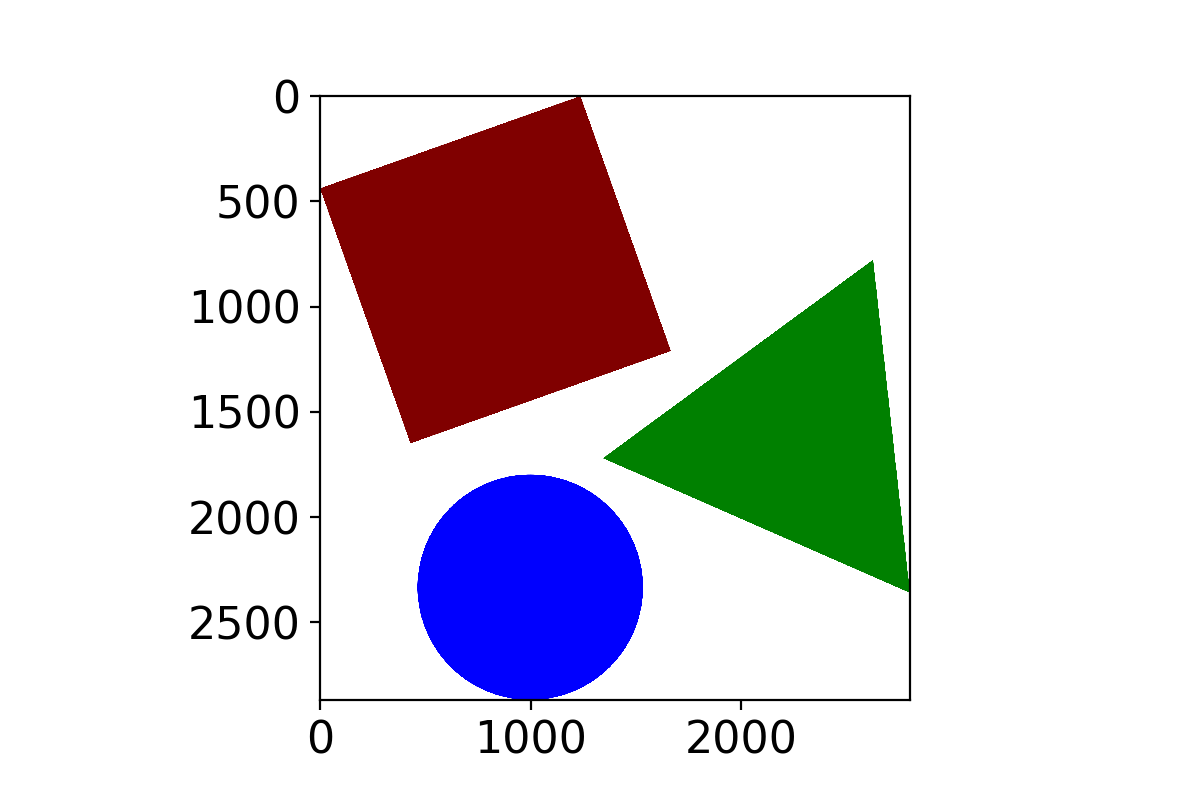

In [157]:
my_image = plt.imread('fig/shapes.png')

fig, ax = plt.subplots(num='shapes_rgb')
ax.imshow(my_image)
plt.show()

Before we move on, we can check again on which class is `my_image` and its shape:

In [160]:
print(type(my_image))

<class 'numpy.ndarray'>


or

In [161]:
print(my_image.__class__)

<class 'numpy.ndarray'>


Finally, we can check the shape of `my_image`.

In [159]:
print(my_image.shape)

(2870, 2802, 4)


This means that this sample image has 2870 rows (height), 2802 columns (width) and four channels or colors (depth). Basically, it is a RBG image. The fourth channel is the PNG transparency. 

Now, what is the type of each pixel?

In [162]:
print(my_image.dtype)

float32


This is because matplotlib uses normalized pixel values from 0 to 1 instead of values from 0 to 255.

### Slice and merging

If we want to see how is the data for a single color, we can simply use array slicing to get it:

<IPython.core.display.Javascript object>


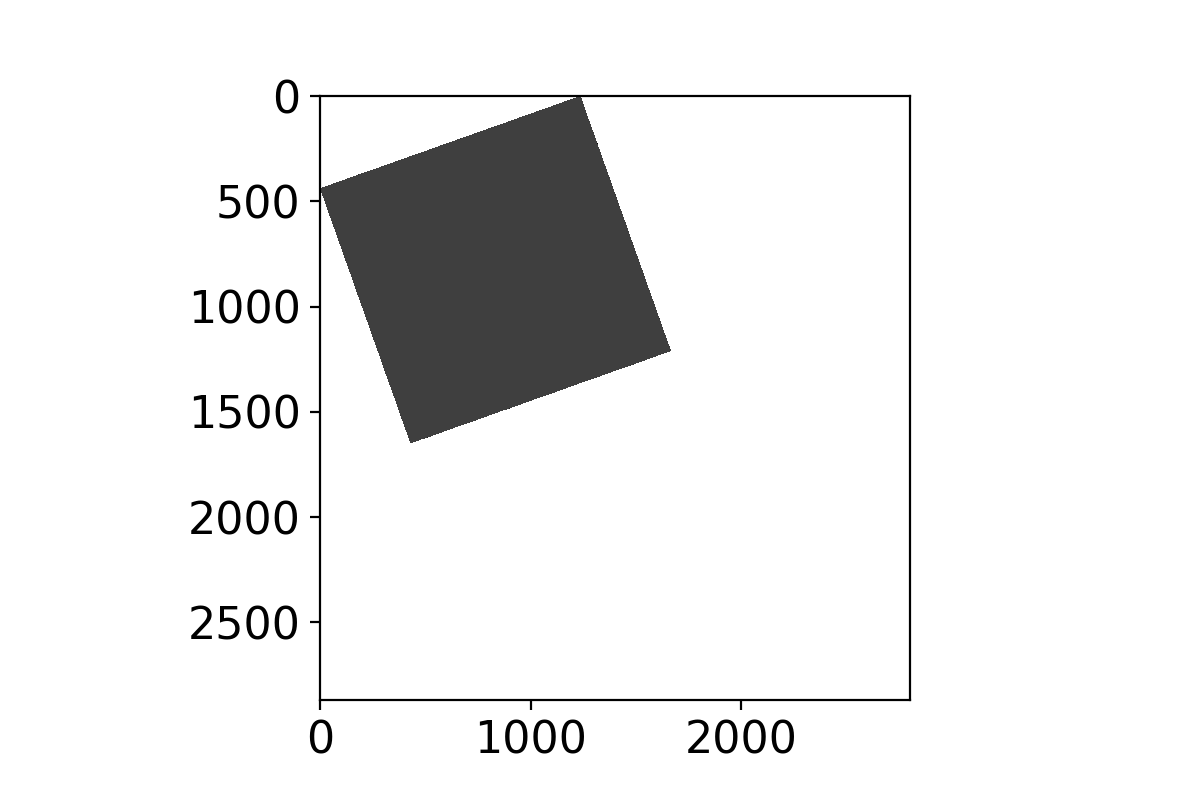

In [176]:
red_channel = my_image[:, :, 0]

fig, ax = plt.subplots(num='shapes_red')
ax.imshow(red_channel, cmap="gray_r")
plt.show()

Let's start playing a bit with our data. When working with images, it is usually much easier to work with a single color or in grayscale. Let us ignore the transparency plane and get a gray image by merging the R, G, and B using their average pixel-by-pixel:

<IPython.core.display.Javascript object>


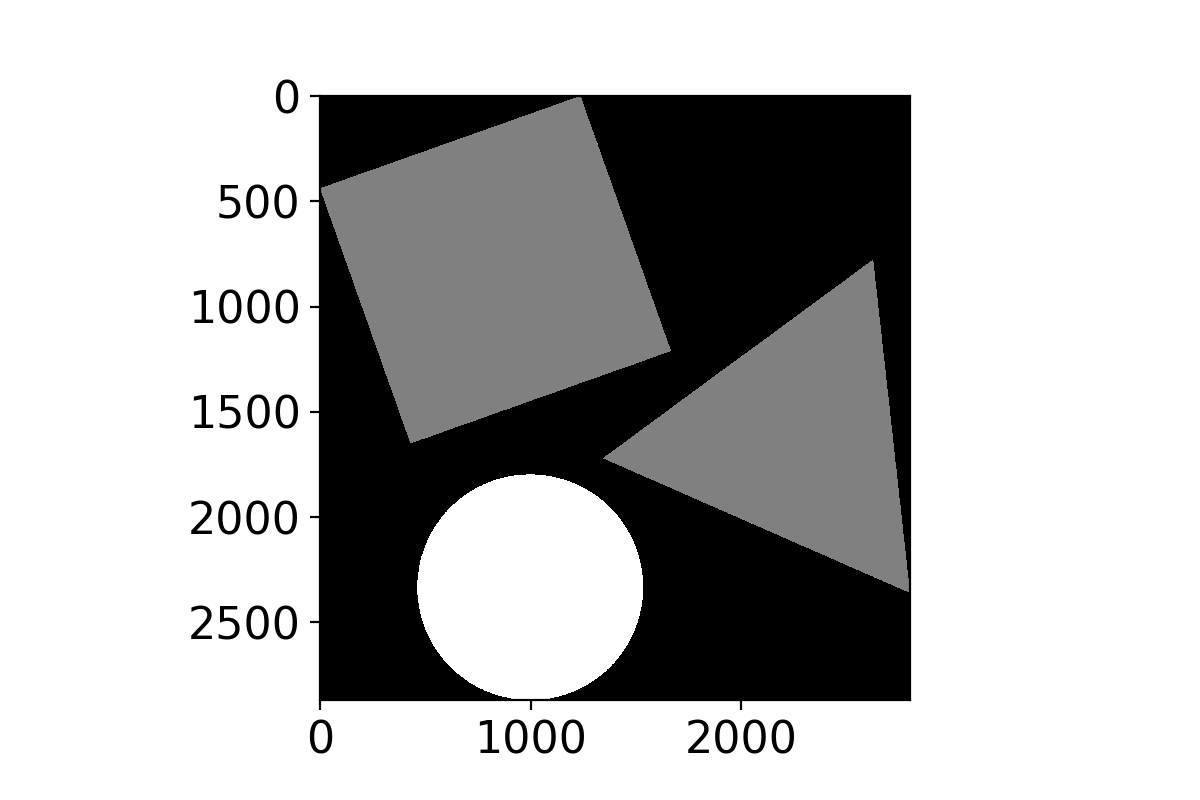

In [177]:
gray_image = my_image[:, :, :3].mean(axis=2)
gray_image = gray_image / gray_image.max()

fig, ax = plt.subplots(num='shapes: gray')
ax.imshow(gray_image, cmap="gray")
plt.show()

### Adding some noise

In order to do something meaninful, let's add some noise to our image:

<IPython.core.display.Javascript object>


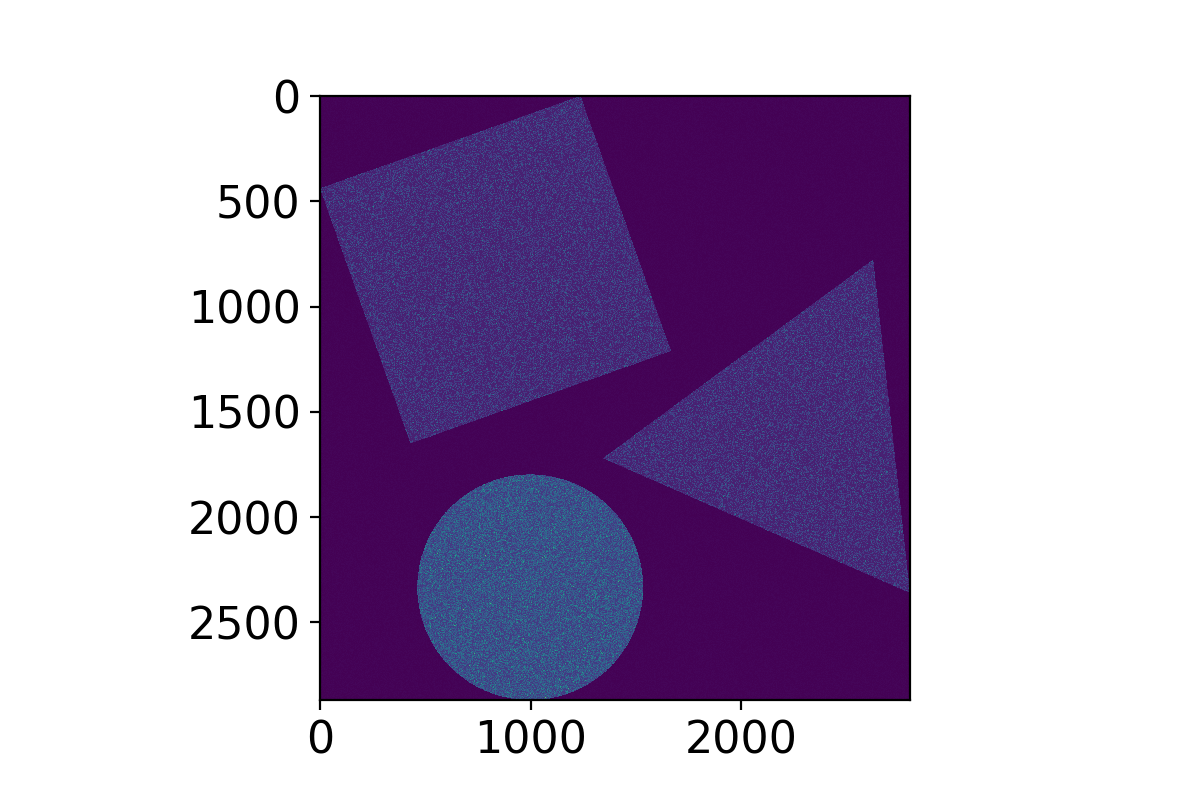

In [202]:
np.random.seed(0) # Make sure we always get same results
noise_random = np.random.uniform(
    low=0.50, high=0.60, size=gray_image.shape)

noise_poisson = 0.5 * np.random.poisson(gray_image)

noisy_image = gray_image + noise_random + noise_poisson

fig, ax = plt.subplots(num='shapes: noisy')
ax.imshow(noisy_image)
plt.show()

### Some stats with NumPy

Numpy has some useful statistical methods. Numpy arrays have [min()], [max()], [mean()], and [std()] methods. They can be used over the whole array or on one of the axes. Numpy has also [numpy.median()] function and [much more].

[min()]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html
[max()]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html
[mean()]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.mean.html
[std()]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.std.html

[numpy.median()]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html
[much more]: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html

In [199]:
print(noisy_image.min())

0.5000000206751437


In [200]:
print(noisy_image.max())

6.507237267277877


In [201]:
print(noisy_image.mean())

0.9799843028624239


In [194]:
print(noisy_image.std())

0.6612658772094668


In [203]:
print(np.median(noisy_image))

0.5925160734130586


<IPython.core.display.Javascript object>


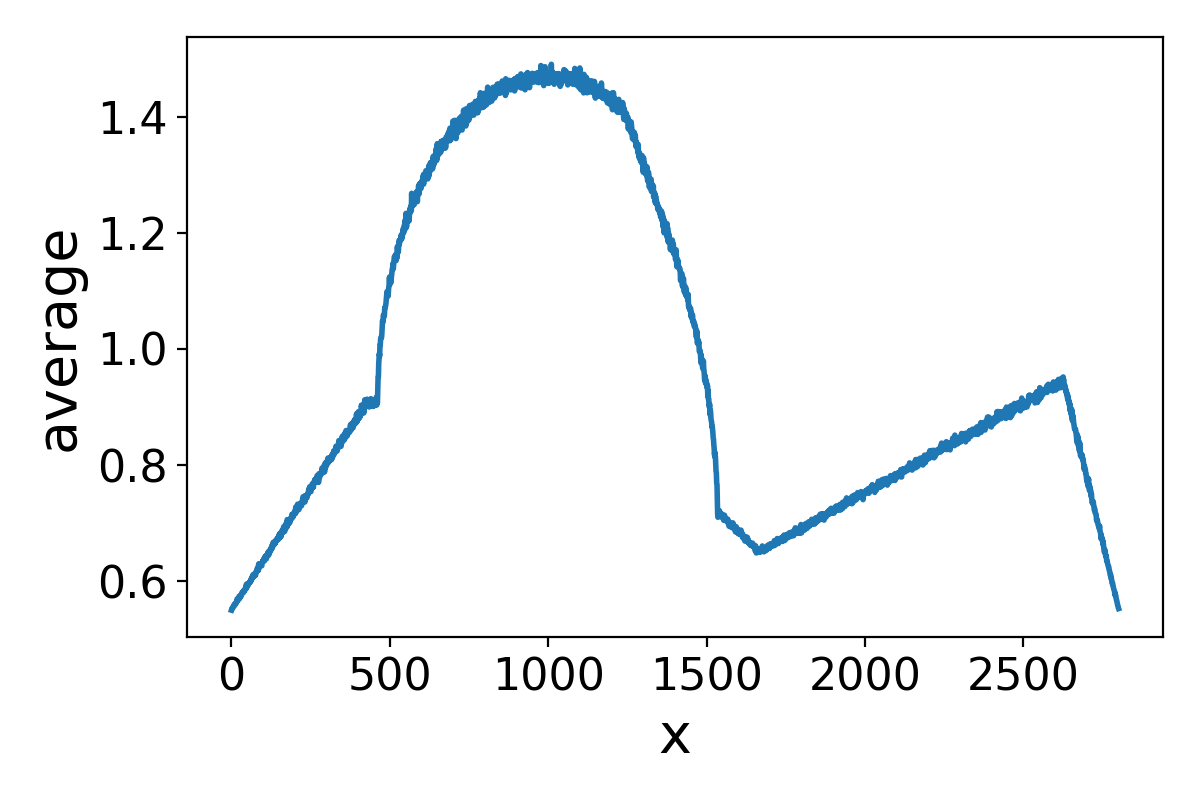

In [204]:
avg_per_col = noisy_image.mean(axis=0)

fig, ax = plt.subplots(num="avs_cols")
ax.plot(avg_per_col)
ax.set_xlabel('x')
ax.set_ylabel('average')

fig.tight_layout()
plt.show()

## Using SciPy

From [scipy.org](scipy.org):

    SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:

- NumPy: Base N-dimensional array package
- SciPy Library: Fundamental library for scientific computing
- MatPlotLib: Comprehensive 2D Plotting
- SymPy: Symbolic mathematics
- iPython: Enhanced Interactive Console
- Pandas: Data structures & analysis

SciPy interacts closely with NumPy. Actually, SciPy's [documentation] uses both packages and starts some NumPy examples. 

SciPy is huge and contains several sub-packages to be used for Science and Engineering purposes:

| Subpackage | Description |
| --- | --- |
| cluster | Clustering algorithms |
| constants | Physical and mathematical constants |
| fftpack | Fast Fourier Transform routines |
| integrate | Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines |
| io | Input and Output |
| linalg | Linear algebra |
| ndimage | N-dimensional image processing |
| odr | Orthogonal distance regression |
| optimize | Optimization and root-finding routines |
| signal | Signal processing |
| sparse | Sparse matrices and associated routines |
| spatial | Spatial data structures and algorithms |
| special | Special functions |
| stats | Statistical distributions and functions|

[documentation]: https://docs.scipy.org/doc/

[PTS2019: Data Visualization I]: https://github.com/b1quint/Python-Tutorial-Series/blob/master/Presentations/PTS2019_DataVizualization_I.pptx

### Reference Material

* [Using Scipy: Based on Lecture Materials By Anthony Scopatz](https://uiuc-cse.github.io/2014-01-30-cse/lessons/thw-scipy/tutorial.html)

### Statistical Mode

SciPy also provides **a lot** of [statictical functions] that can be used with scalars or arrays. 

[statistical functions]: https://docs.scipy.org/doc/scipy/reference/stats.html

SciPy provides a different interface. The correct use of statistical functions is by storing their results into a variable and using it later.

In [259]:
from scipy import stats

results = stats.mode(gray_image)

We can check its class with the `type()` function:

In [260]:
print(type(results))

<class 'scipy.stats.stats.ModeResult'>


For this class, we are interested in the `.count` and `.mode` attributes:

In [261]:
print(results.count)

[[2866 2863 2859 ... 2843 2852 2861]]


In [262]:
print(results.mode)

[[0. 0. 0. ... 0. 0. 0.]]


Here, `stats.mode()` operates along the first array axis (e.g., rows). That means that we have one mode value per column. This matches with the number of elements of our slice:

In [263]:
print(gray_image.shape)
print(results.count.shape)

(2870, 2802)
(1, 2802)


We can change the direction in which the mode is applied by passing the `axis=1` argument:

In [264]:
my_mode = stats.mode(gray_image, axis=1)

print(gray_image.shape)
print(my_mode.count.shape)

(2870, 2802)
(2870, 1)


If I want to get the mode considering the full slice, I need to turn it into one dimension using `flatten()` or `ravel()`:

In [265]:
flat_data = gray_image.flatten()
print(flat_data.shape)

(8041740,)


In [270]:
unraveled_data = gray_image.ravel()
print(unraveled_data.shape)

(8041740,)


And now I can calculate the mode again:

In [271]:
my_mode = stats.mode(flat_data)
print(my_mode.count)
print(my_mode.mode)

[4346287]
[0.]


Each `scipy.stats` function may return a different object. So you might always check the documentation when exploring a new function.

You might notice that we used the `gray_image` instead of using the `noisy_image`. We did this because when we added the noise, there was not a clear mode value anymore so SciPy would take a long time and give wrong result. We can fix that by rounding the data to a smaller number of decimals:

In [311]:
flat_data = noisy_image.flatten()
rounded_data = np.round(flat_data, decimals=2)
results = stats.mode(rounded_data)

In [312]:
print(results)

ModeResult(mode=array([0.58]), count=array([436073]))


More decimals implies in more processing time and in less number of counts. The optimal number of decimals will depend on the size of your image, how is your noise, etc.

### ndimage

SciPy also has a module dedicated to work on images. It contains several functions to manipulate images like morphological functions (eg. closin and opening), fourier transformation, and filters. Here we will simply use a gaussian filter in order to make the image smoother.

First, let us subtract the background noise from our whole image and plot it:

<IPython.core.display.Javascript object>


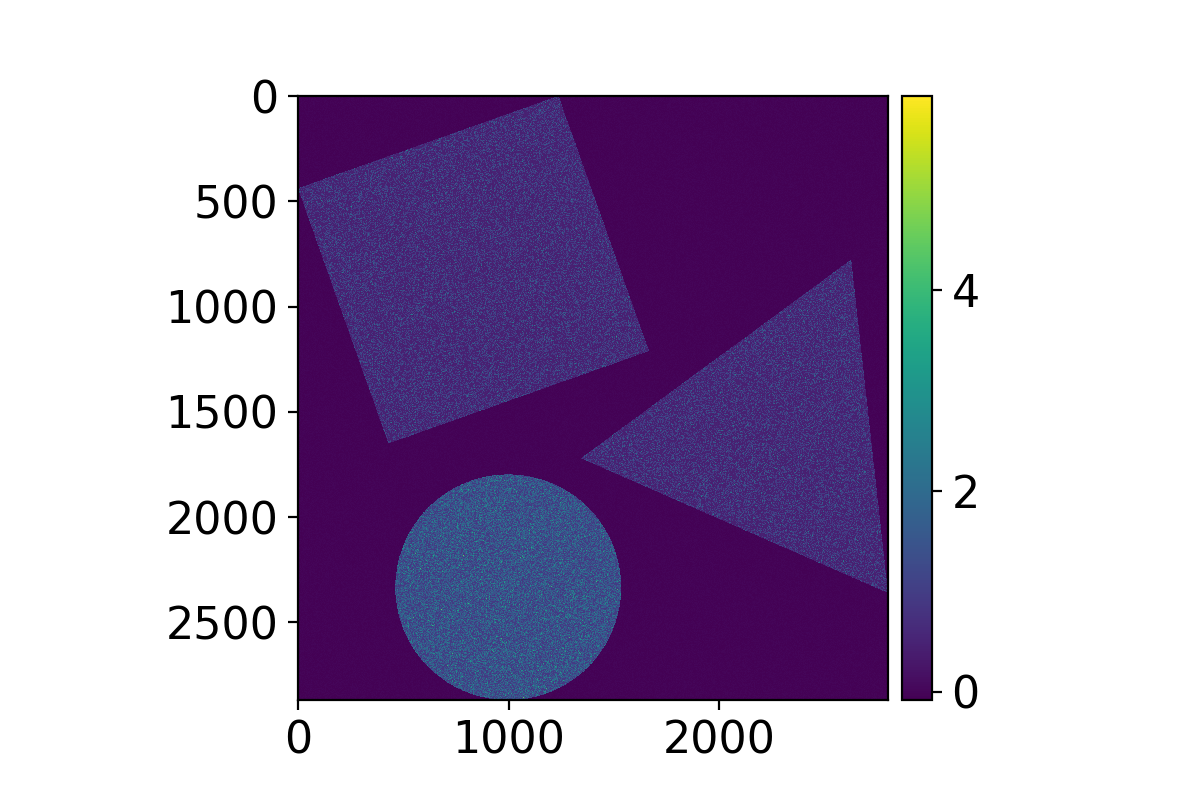

In [325]:
data = noisy_image - results.mode[0]

fig, ax = plt.subplots(num="ndimage: raw")
im = ax.imshow(data)

div = make_axes_locatable(ax)
cax = div.append_axes("right", "5%", pad="2.5%")
cbar = fig.colorbar(im, cax=cax)

plt.show()

Now, we can apply the gaussian filter and see how the image seems better:

<IPython.core.display.Javascript object>


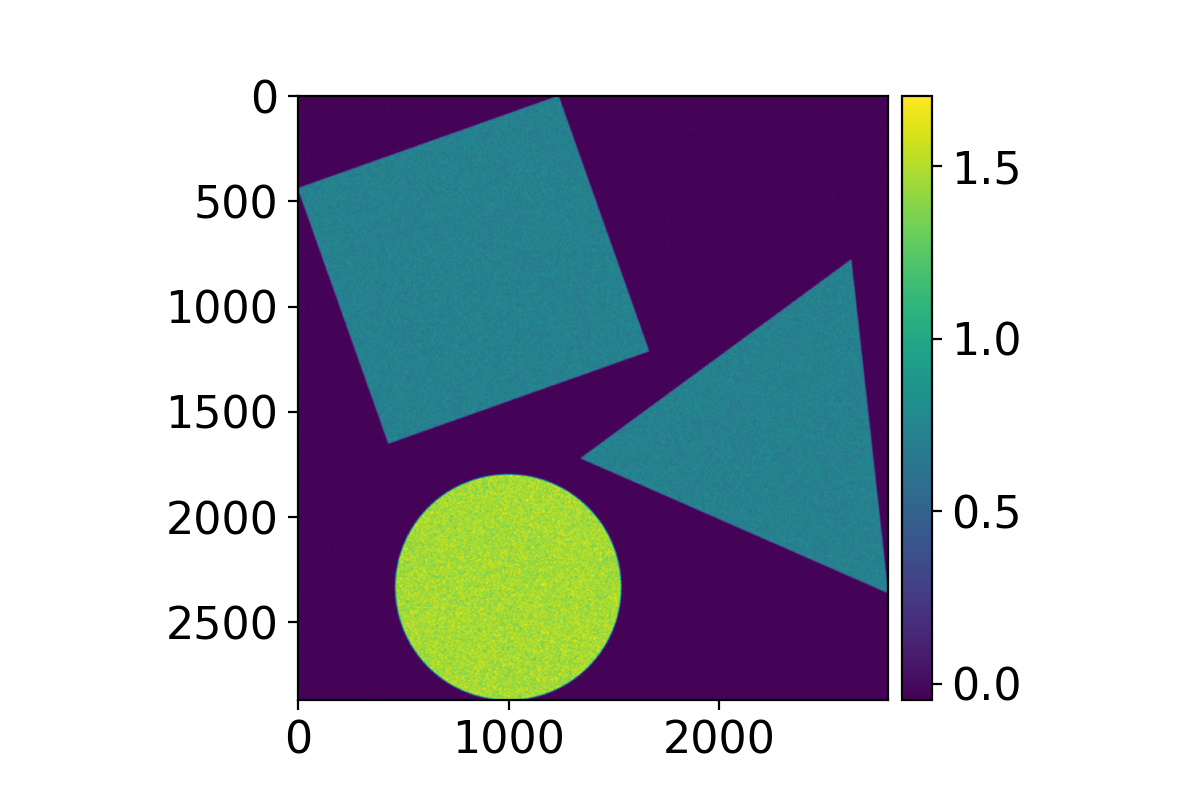

In [326]:
from scipy import ndimage

smooth_data = ndimage.gaussian_filter(data, sigma=3)

fig, ax = plt.subplots(num="ndimage: smooth")
im = ax.imshow(smooth_data)

div = make_axes_locatable(ax)
cax = div.append_axes("right", "5%", pad="2.5%")
cbar = fig.colorbar(im, cax=cax)

plt.show()

## Masked Arrays

Numpy comes with a sub-module called `numpy.ma` that can be used to work with masked arrays. One practical example is where we want to calculate the average of the pixels without considering the ones close to the background level. 

First, let us create our masked array:

In [ ]:
limit = 0.2

masked_data = np.ma.masked_less(smooth_data, limit)

Now, let us print the average value of the pixels in this array:

In [329]:
print(np.ma.mean(masked_data))

0.8978273280567104


Ok, and what would be the average of the full array?

In [330]:
print(np.mean(data))

0.3999843028624248


There is a large difference between the two average values. This happens because the second one considers the whole array while the first one considers only the data in pixels with value above 0.2.

Now, we can use maplotlib to see our masked data. This can be done by changing the color pallete's property `.set_bad()` and passing this palette to `imshow(...)`. See the example below:

<IPython.core.display.Javascript object>


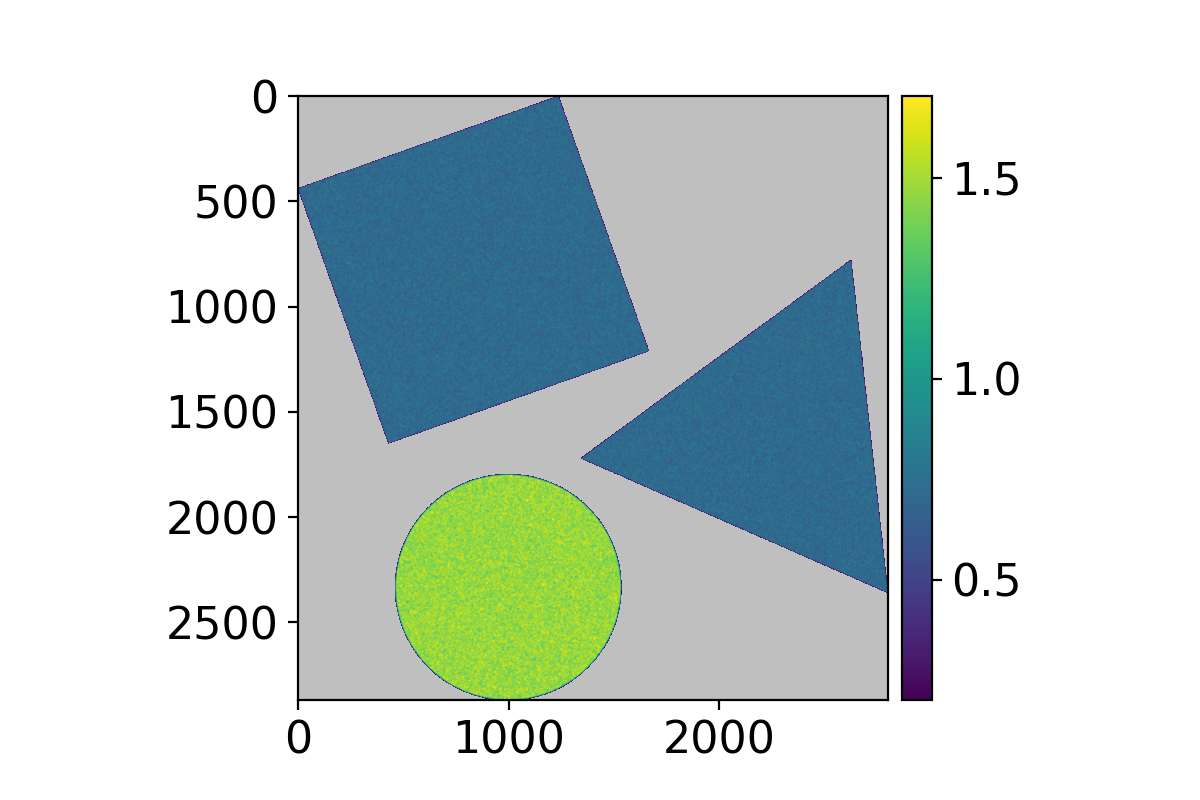

In [333]:
from matplotlib import cm

palette = cm.viridis
palette.set_bad('gray', alpha=0.5)

fig, ax = plt.subplots(num="masked array")
im = ax.imshow(masked_data, cmap=palette)

div = make_axes_locatable(ax)
cax = div.append_axes("right", "5%", pad="2.5%")
cbar = fig.colorbar(im, cax)

plt.show()